In [1]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_ebay_deals.csv to cleaned_ebay_deals.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

df = pd.read_csv("cleaned_ebay_deals.csv")
print(df.head())

             timestamp                                              Title  \
0  2025-11-01 05:17:40  Apple iPhone 15 Pro Max A2849 1TB Natural Unlo...   
1  2025-11-01 05:17:50  Samsung Galaxy S24+ 256GB S926U Unlocked - Ope...   
2  2025-11-01 05:17:51  Sony SRSXV800 XSeries Wireless Portable Blueto...   
3  2025-11-01 05:18:02  MSI MPG 321CURX QD-OLED 32" UHD Curved Gaming ...   
4  2025-11-01 05:18:03  Apple iPhone 16 A3081 T-Mobile Only 128GB Blac...   

   Original Price  Discounted Price           Shipping Details  \
0          747.47            747.47  Shipping info unavailable   
1          999.99            418.99  Shipping info unavailable   
2          648.00            385.99  Shipping info unavailable   
3         1099.99            739.99  Shipping info unavailable   
4          409.99            409.99  Shipping info unavailable   

                                                 url  Discount Percentage  
0  https://www.ebay.com/itm/357492955429?_trkparm...            

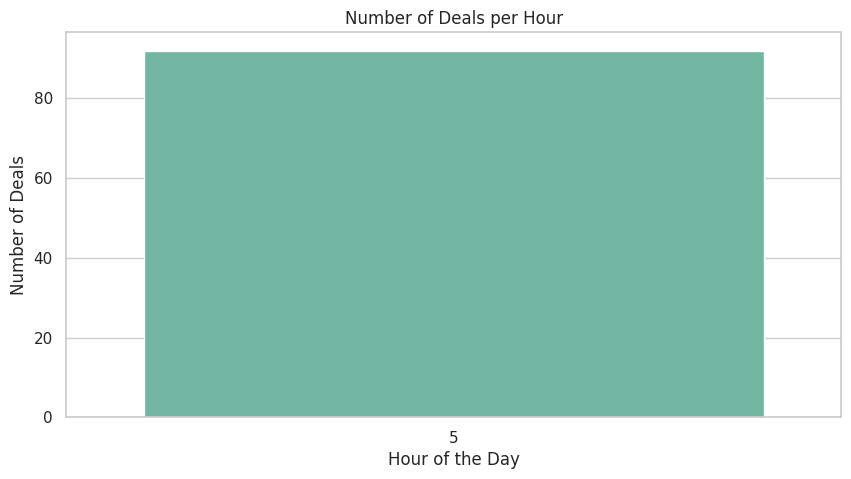

In [3]:
# Time Series Analysis
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.sort_values("timestamp")
df["hour"] = df["timestamp"].dt.hour

deals_per_hour = df["hour"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=deals_per_hour.index, y=deals_per_hour.values)
plt.title("Number of Deals per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.show()

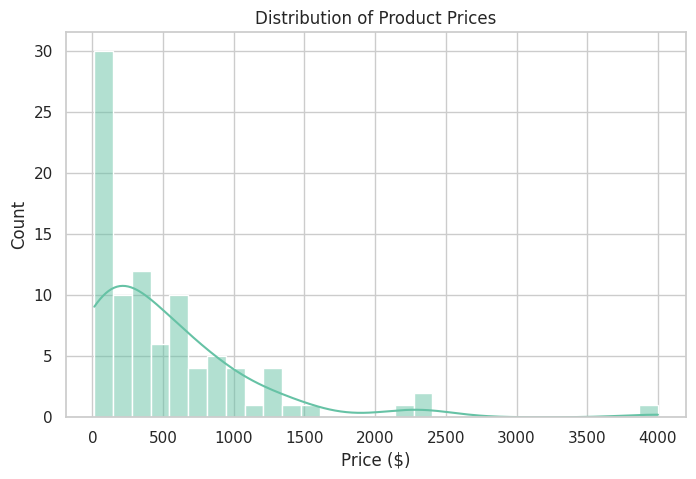

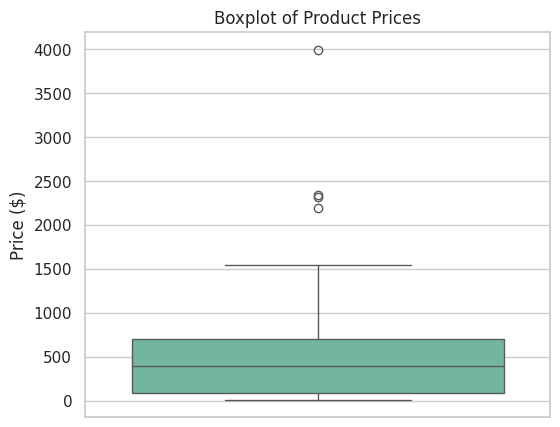

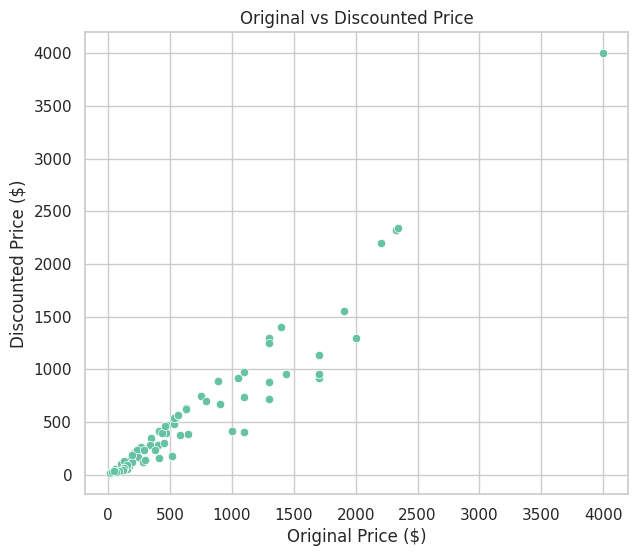

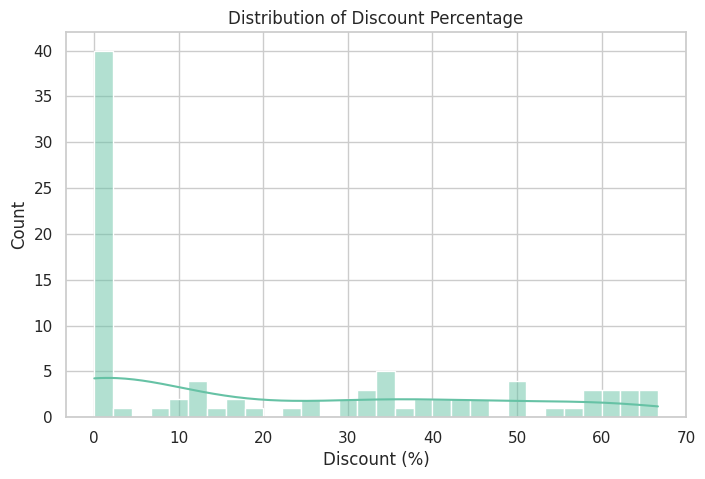

In [5]:
# Price and Discount Analysis
plt.figure(figsize=(8,5))
sns.histplot(df["Discounted Price"], bins=30, kde=True)
plt.title("Distribution of Product Prices")
plt.xlabel("Price ($)")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(y=df["Discounted Price"])
plt.title("Boxplot of Product Prices")
plt.ylabel("Price ($)")
plt.show()

plt.figure(figsize=(7,6))
sns.scatterplot(x="Original Price", y="Discounted Price", data=df)
plt.title("Original vs Discounted Price")
plt.xlabel("Original Price ($)")
plt.ylabel("Discounted Price ($)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["Discount Percentage"], bins=30, kde=True)
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount (%)")
plt.show()

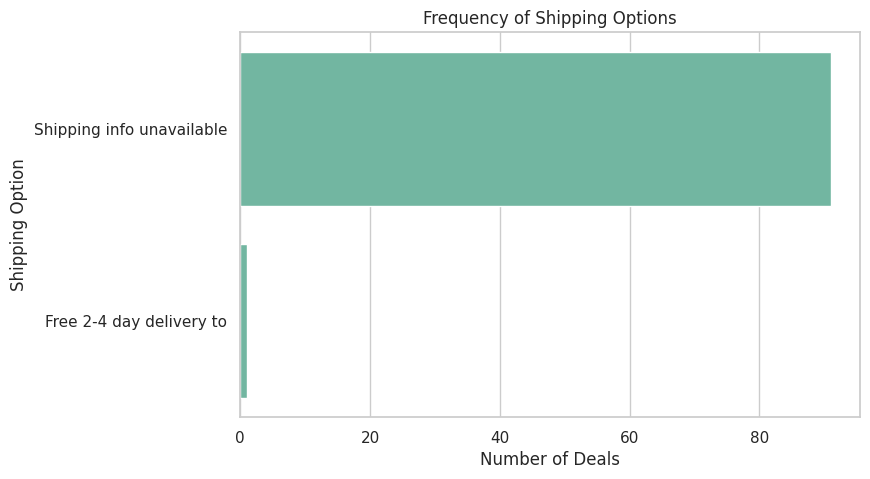

In [6]:
# Shipping Information Analysis
shipping_counts = df["Shipping Details"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=shipping_counts.values, y=shipping_counts.index)
plt.title("Frequency of Shipping Options")
plt.xlabel("Number of Deals")
plt.ylabel("Shipping Option")
plt.show()

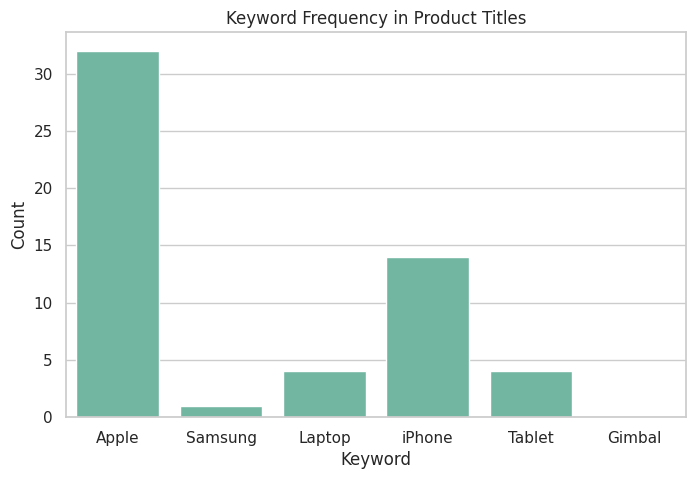

In [7]:
# Text Analysis on Titles
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]
keyword_counts = {word: df["Title"].str.contains(word, case=False, na=False).sum() for word in keywords}
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=["Keyword", "Count"])

plt.figure(figsize=(8,5))
sns.barplot(x="Keyword", y="Count", data=keyword_df)
plt.title("Keyword Frequency in Product Titles")
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.show()

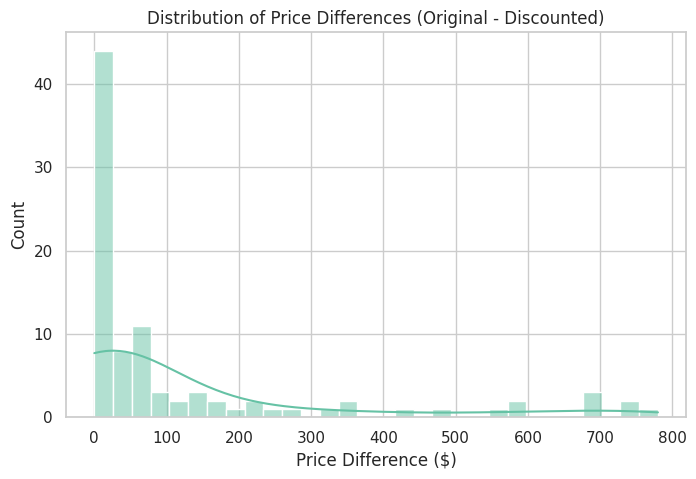

In [9]:
# Price Difference Analysis
df["Price Difference"] = df["Original Price"] - df["Discounted Price"]

plt.figure(figsize=(8,5))
sns.histplot(df["Price Difference"], bins=30, kde=True)
plt.title("Distribution of Price Differences (Original - Discounted)")
plt.xlabel("Price Difference ($)")
plt.show()

In [10]:
# Top 5 Deals by Discount
top5 = df.sort_values("Discount Percentage", ascending=False).head(5)
print("Top 5 Deals with Highest Discounts:")
top5[["Title", "Discounted Price", "Original Price", "Discount Percentage", "Shipping Details", "url"]]

Top 5 Deals with Highest Discounts:


,Title,Discounted Price,Original Price,Discount Percentage,Shipping Details,url
55,Soundcore Liberty 4 SE True Wireless Earbuds H...,49.99,149.99,66.67,Shipping info unavailable,https://www.ebay.com/itm/385693088002?_trkparm...
69,Sigma MC-11 Lens Mount Converter (Sigma SA/EOS...,178.61,510.95,65.04,Shipping info unavailable,https://www.ebay.com/itm/286197283832?_trkparm...
77,Vera Bradley Women's Outlet Ultralight Laptop ...,41.70,119.00,64.96,Shipping info unavailable,https://www.ebay.com/itm/365930191290?_trkparm...
14,Apple iPhone 14 Pro A2650 (Fully Unlocked) 128...,405.99,1099.00,63.06,Shipping info unavailable,https://www.ebay.com/itm/286883274280?_trkparm...
85,Apple iPhone 14 Pro A2650 (Fully Unlocked) 128...,405.99,1099.00,63.06,Shipping info unavailable,https://www.ebay.com/itm/286883274280?_trkparm...
